In [1]:
import requests
import pandas as pd

In [2]:
# CoinGecko(幣虎), https://www.coingecko.com/zh-tw
# YouTube: https://www.youtube.com/watch?v=wZ48Gjb-k2U
url = "https://www.coingecko.com/price_charts/1/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [3]:
# 資料為json格式
prices = data.json()['stats']

In [4]:
prices

[[1367107200000, 135.3],
 [1367193600000, 141.96],
 [1367280000000, 135.3],
 [1367366400000, 117.0],
 [1367452800000, 103.43],
 [1367539200000, 91.01],
 [1367625600000, 111.25],
 [1367712000000, 116.79],
 [1367798400000, 118.33],
 [1367884800000, 106.4],
 [1367971200000, 112.64],
 [1368057600000, 113.0],
 [1368144000000, 118.78],
 [1368230400000, 113.01],
 [1368316800000, 114.713],
 [1368403200000, 117.18],
 [1368489600000, 114.5],
 [1368576000000, 114.156],
 [1368662400000, 115.5],
 [1368748800000, 123.1],
 [1368835200000, 123.88],
 [1368921600000, 120.501],
 [1369008000000, 122.58],
 [1369094400000, 122.9],
 [1369180800000, 123.0],
 [1369267200000, 125.748],
 [1369353600000, 131.7],
 [1369440000000, 130.77],
 [1369526400000, 134.6],
 [1369612800000, 128.985],
 [1369699200000, 129.179],
 [1369785600000, 132.13],
 [1369872000000, 127.401],
 [1369958400000, 127.98],
 [1370044800000, 129.09],
 [1370131200000, 121.3],
 [1370217600000, 121.16],
 [1370390400000, 121.309],
 [1370476800000, 1

In [5]:
# 轉成dataframe
df = pd.DataFrame(prices)
df.head()

,0,1
0,1367107200000,135.30
1,1367193600000,141.96
2,1367280000000,135.30
3,1367366400000,117.00
4,1367452800000,103.43


In [6]:
df.columns = ['datetime', 'usd']
df.head()

,datetime,usd
0,1367107200000,135.30
1,1367193600000,141.96
2,1367280000000,135.30
3,1367366400000,117.00
4,1367452800000,103.43


In [7]:
# 將datetime欄位轉成日期格式, 資料取樣為天
pd.to_datetime(df['datetime'], unit='ms')

0      2013-04-28 00:00:00.000
1      2013-04-29 00:00:00.000
2      2013-04-30 00:00:00.000
3      2013-05-01 00:00:00.000
4      2013-05-02 00:00:00.000
5      2013-05-03 00:00:00.000
6      2013-05-04 00:00:00.000
7      2013-05-05 00:00:00.000
8      2013-05-06 00:00:00.000
9      2013-05-07 00:00:00.000
10     2013-05-08 00:00:00.000
11     2013-05-09 00:00:00.000
12     2013-05-10 00:00:00.000
13     2013-05-11 00:00:00.000
14     2013-05-12 00:00:00.000
15     2013-05-13 00:00:00.000
16     2013-05-14 00:00:00.000
17     2013-05-15 00:00:00.000
18     2013-05-16 00:00:00.000
19     2013-05-17 00:00:00.000
20     2013-05-18 00:00:00.000
21     2013-05-19 00:00:00.000
22     2013-05-20 00:00:00.000
23     2013-05-21 00:00:00.000
24     2013-05-22 00:00:00.000
25     2013-05-23 00:00:00.000
26     2013-05-24 00:00:00.000
27     2013-05-25 00:00:00.000
28     2013-05-26 00:00:00.000
29     2013-05-27 00:00:00.000
                 ...          
2235   2019-06-13 00:00:00.000
2236   2

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df.head()

,datetime,usd
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [9]:
# 轉成時間序列
df.index = df['datetime']
df.head()

,datetime,usd
datetime,,
2013-04-28,2013-04-28,135.30
2013-04-29,2013-04-29,141.96
2013-04-30,2013-04-30,135.30
2013-05-01,2013-05-01,117.00
2013-05-02,2013-05-02,103.43


In [10]:
type(df['usd'])

pandas.core.series.Series

Populating the interactive namespace from numpy and matplotlib


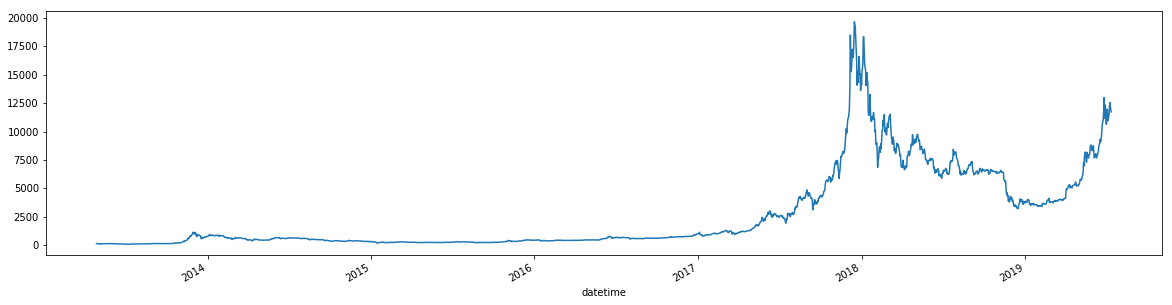

In [11]:
%pylab inline
df['usd'].plot(kind = 'line', figsize=[20, 5])

## MA技術指標

均線是移動平均線的簡稱，英文稱為(Moving Average, MA)，簡單的說就是過一段時間內的平均值。  
接下來增加一個5日均線及10日均線

In [12]:
df['ma5'] = df['usd'].rolling(window = 5).mean()
df['ma10'] = df['usd'].rolling(window = 10).mean()
df.head(40)

,datetime,usd,ma5,ma10
datetime,,,,
2013-04-28,2013-04-28,135.300,NaN,NaN
2013-04-29,2013-04-29,141.960,NaN,NaN
2013-04-30,2013-04-30,135.300,NaN,NaN
2013-05-01,2013-05-01,117.000,NaN,NaN
2013-05-02,2013-05-02,103.430,126.5980,NaN
2013-05-03,2013-05-03,91.010,117.7400,NaN
2013-05-04,2013-05-04,111.250,111.5980,NaN
2013-05-05,2013-05-05,116.790,107.8960,NaN
2013-05-06,2013-05-06,118.330,108.1620,NaN


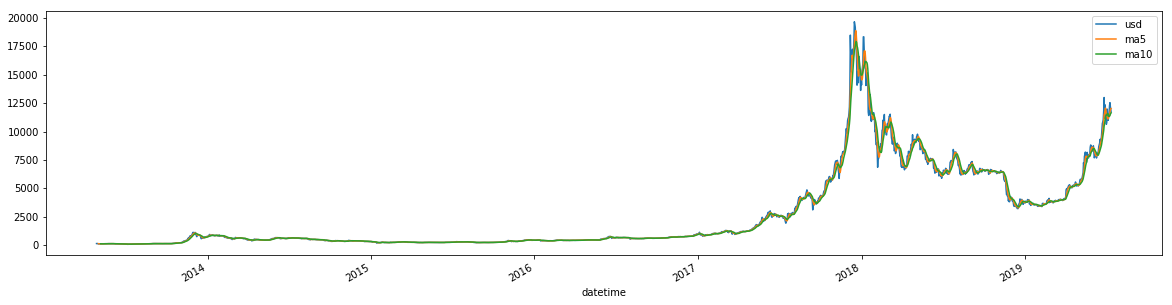

In [13]:
df[['usd','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

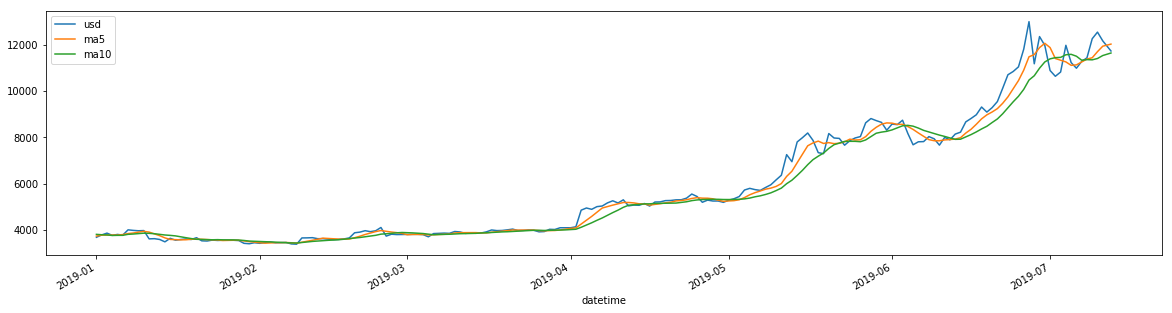

In [14]:
df2 = df[df['datetime'] >= '2019-01-01']
df2[['usd','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

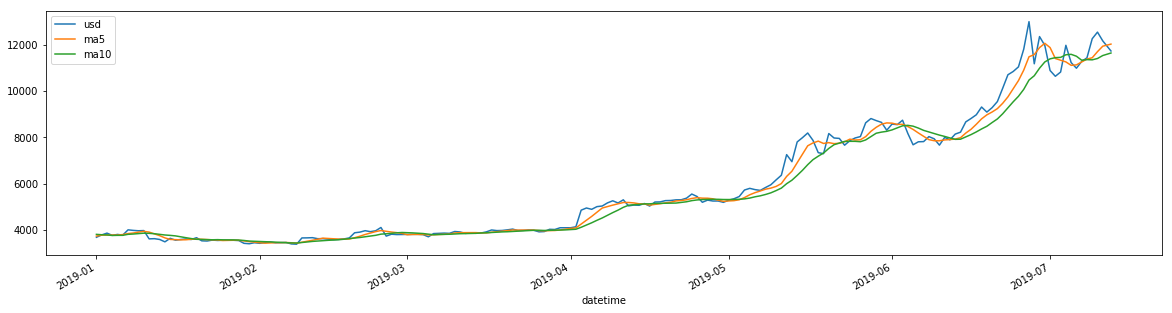

In [15]:
df3 = df[df['datetime'] >= '2019-01-01']
df3[['usd','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

## 布林通道
參考網址:https://www.cmoney.tw/notes/note-detail.aspx?nid=17738

布林通道 是結合 均線 和 標準差 的概念
以 20MA 為中心 上下各2個標準差 為範圍的軌道操作方式
布林通道 又稱 布林格帶狀(Bollinger Bands，BBands) 或 保力加通道，

是由 約翰．布林格(John Bollinger) 所提出的概念。

 

 

原始設定為:

帶狀上限 = 帶狀中心線 + 2個標準差

帶狀中心線 = 20期移動平均線(即20MA)

帶狀下限 = 帶狀中心線 - 2個標準差

 

布林格 結合了 移動平均線 和 統計學標準差 的概念。

其中基本的型態，就是由 3條軌道線組成的帶狀通道。

中軌 = 平均成本

上軌 = 股價的壓力線

下軌 = 股價的支撐線

In [16]:
df['ma20'] = df['usd'].rolling(window = 20).mean()
df['std20'] = df['usd'].rolling(window = 20).std()
df['BB+'] = df['ma20'] + df['usd'].rolling(window = 20).std()*2
df['BB-'] = df['ma20'] - df['usd'].rolling(window = 20).std()*2
df.head(30)

,datetime,usd,ma5,ma10,ma20,std20,BB+,BB-
datetime,,,,,,,,
2013-04-28,2013-04-28,135.300,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,2013-04-29,141.960,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,2013-04-30,135.300,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,2013-05-01,117.000,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,2013-05-02,103.430,126.5980,NaN,NaN,NaN,NaN,NaN
2013-05-03,2013-05-03,91.010,117.7400,NaN,NaN,NaN,NaN,NaN
2013-05-04,2013-05-04,111.250,111.5980,NaN,NaN,NaN,NaN,NaN
2013-05-05,2013-05-05,116.790,107.8960,NaN,NaN,NaN,NaN,NaN
2013-05-06,2013-05-06,118.330,108.1620,NaN,NaN,NaN,NaN,NaN


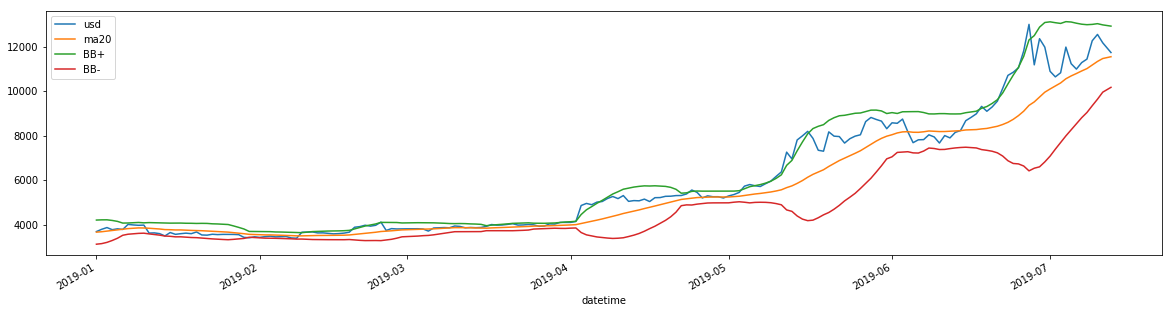

In [20]:
df4 = df[df['datetime'] >= '2019-01-01']
df4[['usd','ma20','BB+', 'BB-']].plot(kind = 'line', figsize=[20, 5])

# 黃金交叉賺黃金：

## 「短期均線」向上突破「長期均線」
黃金交叉後，股價走「多頭」的機率高
以短線操作來說，當 5 日均線向上突破 20 日均線，也就是短期的平均買進成本大於長期平均成本
代表短期買方的力道較大，市場上大多數人獲利
市場易走出「多頭」的趨勢，進而帶動長期均線向上，
讓股價上漲機率較大。

# 死亡交叉下地獄：

## 「短期均線」向下跌破「長期均線」
死亡交叉後，股價走「空頭」機會大
以短線操作來說，當 5 日均線向下跌破 20 日均線，也就是短期的平均買進成本小於長期平均成本
表示短線上投資人都賠錢人，賣方的力道較大
市場容易走出「空頭」的趨勢，進而帶動長期均線向下
股價後續較容易出現弱勢下跌的走勢。

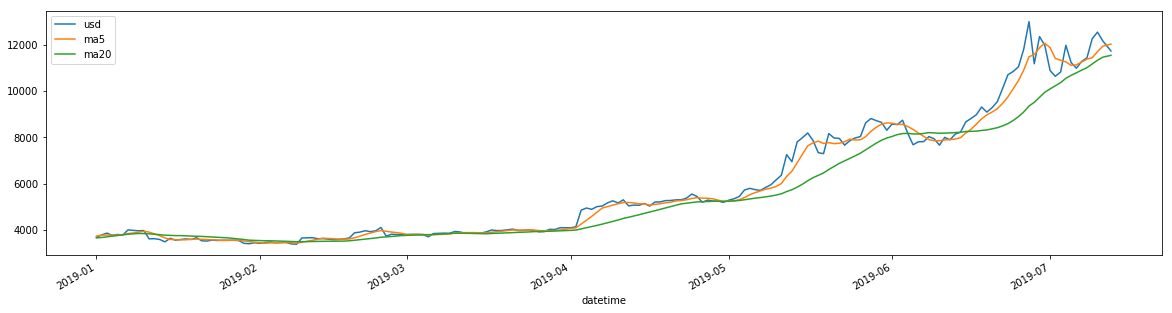

In [21]:
df5 = df[df['datetime'] >= '2019-01-01']
df5[['usd','ma5','ma20']].plot(kind = 'line', figsize=[20, 5])